# Absenteeism project


In [1]:
import os
# visulization 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pylab import rcParams
# for arrays matrixs
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale 
##anova
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm




import matplotlib.pyplot
from matplotlib.pyplot import figure

In [2]:
os.getcwd()


'C:\\Users\\Poorna'

In [3]:

print(os.getcwd())



C:\Users\Poorna


In [4]:
os.chdir('C:\\Users\\Poorna\\Desktop\\ddata  science projects\\project 1')
data = pd.read_csv("MFGEmployees4.csv")

data

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


In [5]:
data.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [6]:
print(data.isnull().sum())

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
dtype: int64


In [7]:
data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
EmployeeNumber    8336 non-null int64
Surname           8336 non-null object
GivenName         8336 non-null object
Gender            8336 non-null object
City              8336 non-null object
JobTitle          8336 non-null object
DepartmentName    8336 non-null object
StoreLocation     8336 non-null object
Division          8336 non-null object
Age               8336 non-null float64
LengthService     8336 non-null float64
AbsentHours       8336 non-null float64
BusinessUnit      8336 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 846.7+ KB


In [10]:
data.describe()



,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [11]:
data.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

In [12]:
data.head(3)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores


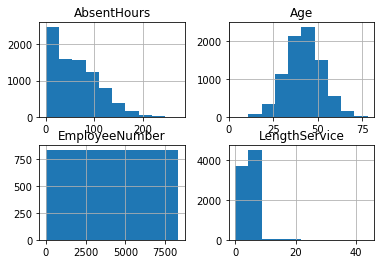

<Figure size 576x360 with 0 Axes>

In [13]:
fig =data.hist()


plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)
fig.savefig('test2png.png', dpi=100)


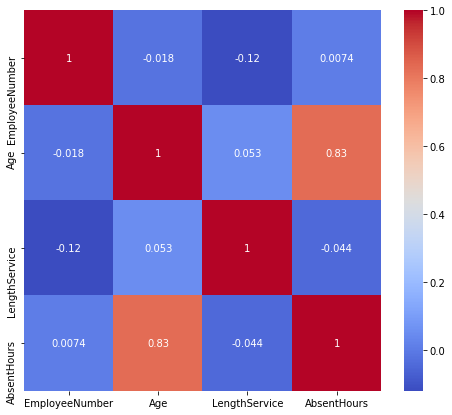

In [14]:
#making a heatmap for the correlation of dataset
fig = plt.figure(figsize = (8,7))
sns.heatmap(data.corr(), annot = True,cmap = "coolwarm")

# # Gender barplot

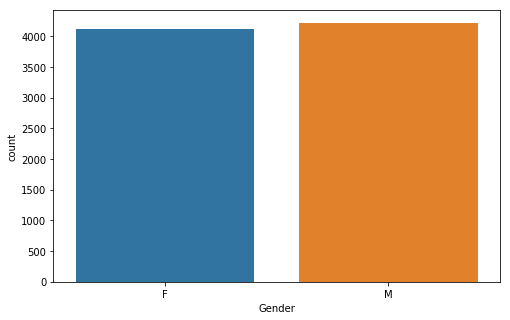

In [15]:
sns.countplot(x='Gender', data=data);

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)
fig.savefig('test2png.png', dpi=100)

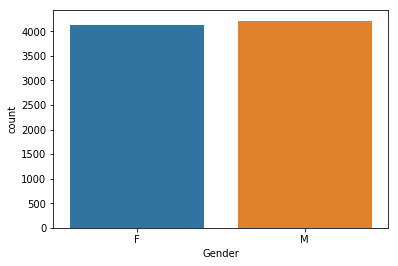

In [16]:
sns.countplot(data['Gender'])

# City   barplot

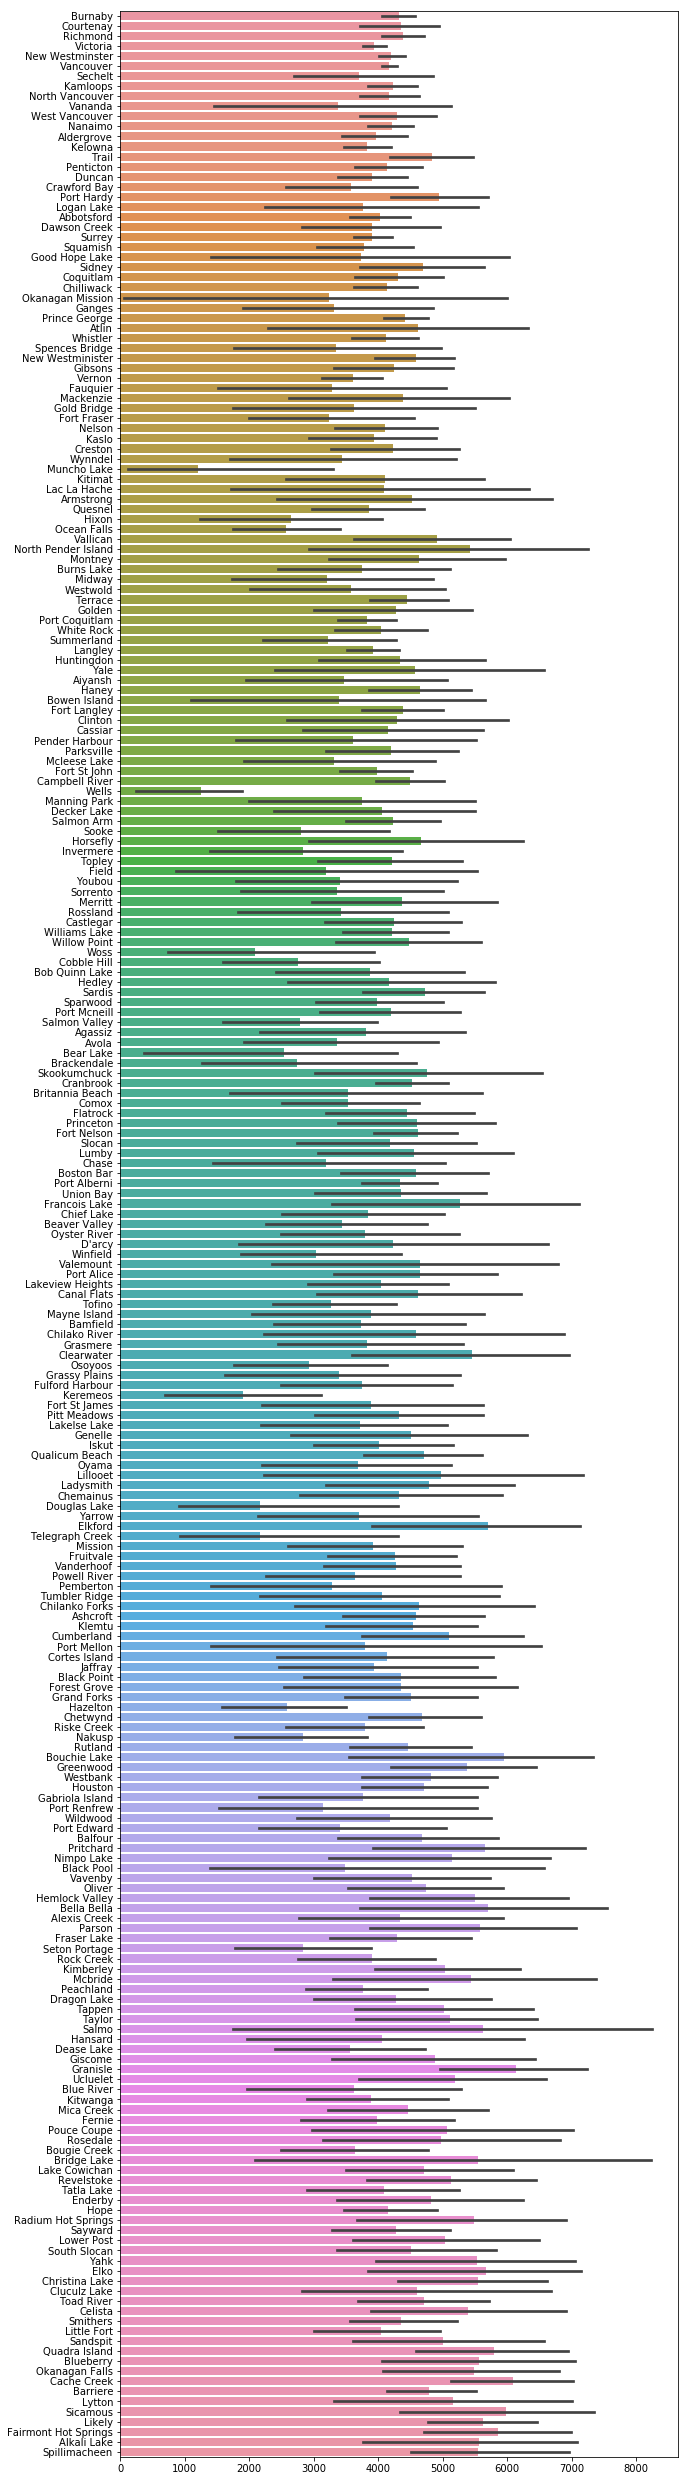

In [16]:


t=np.arange(8336)
x=data.iloc[:,4].values
import seaborn as sns
sns.barplot(t,x,data=data)
#rcParams['figure.figsize']=10,100

#ig = plt.figure(figsize = (10,10))

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 45)
fig.savefig('test2png.png', dpi=100)


# Job Title  barplot

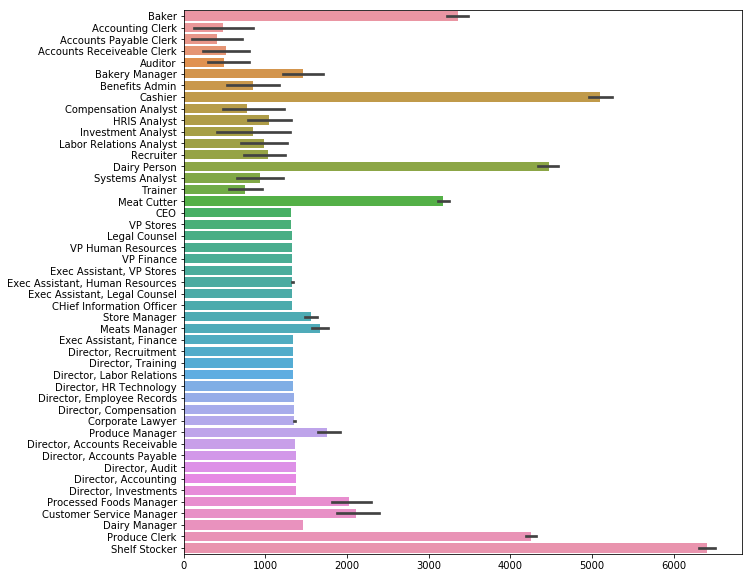

In [17]:


t=np.arange(8336)
x=data.iloc[:,5].values
import seaborn as sns
sns.barplot(t,x,data=data)
#rcParams['figure.figsize']=10,100

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.savefig('test2png.png', dpi=100)


# Department barplot

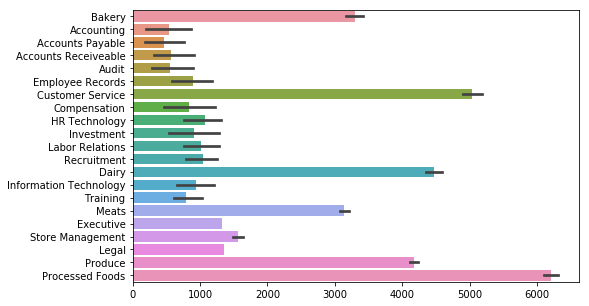

In [18]:


t=np.arange(8336)
x=data.iloc[:,6].values
import seaborn as sns
sns.barplot(t,x,data=data)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)
fig.savefig('test2png.png', dpi=100)


# Store Location  barplot

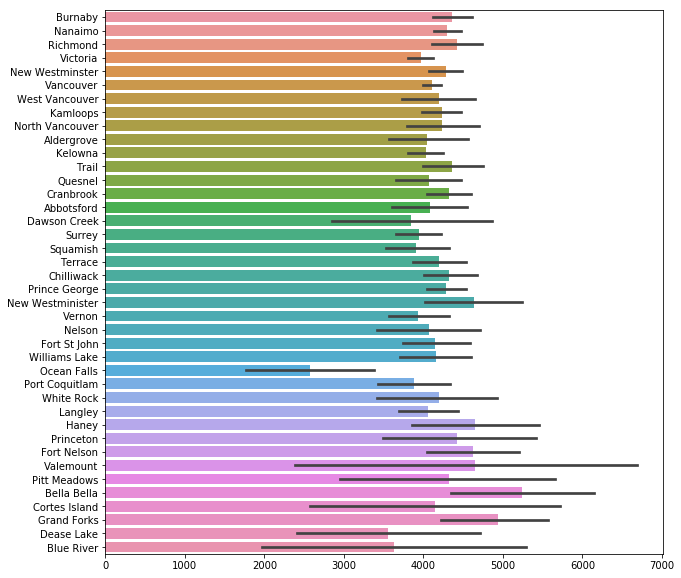

In [19]:


t=np.arange(8336)
x=data.iloc[:,7].values
import seaborn as sns
sns.barplot(t,x,data=data)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.savefig('test2png.png', dpi=100)

# Division barplot

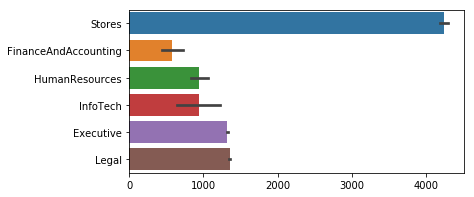

In [20]:

t=np.arange(8336)
x=data.iloc[:,8].values
import seaborn as sns
sns.barplot(t,x,data=data)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

# Business Unit barplot

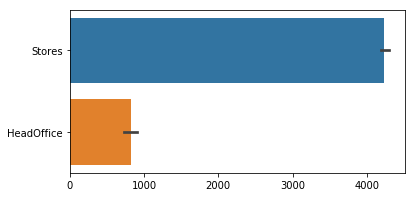

In [21]:

import numpy as np

t=np.arange(8336)
x=data.iloc[:,12].values
import seaborn as sns
sns.barplot(t,x,data=data)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

# employee age

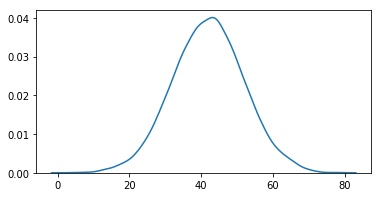

In [22]:


import seaborn as sns
x=data.iloc[:,9].values
sns.kdeplot(x)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

# Length of Service

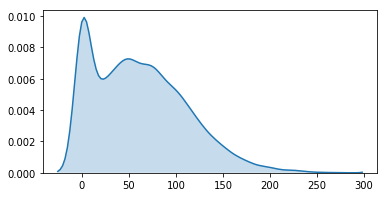

In [23]:


y=data.iloc[:,11].values
sns.kdeplot(y,shade=True)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

# absent hours

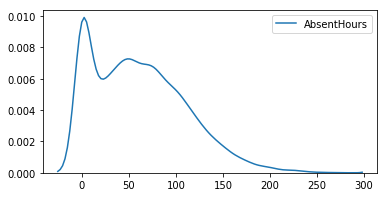

In [24]:

z=data.iloc[:,12].values
sns.kdeplot(data.AbsentHours)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

In [25]:
data =data[data.Age>18]
data =data[data.Age<=65]

In [26]:
data['AbsenceRate'] =data.AbsentHours / 2080 * 100

# ABSENT RATE

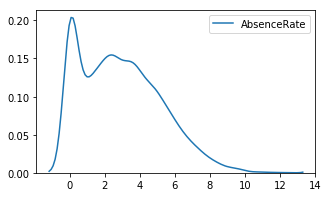

In [27]:


#Data Transformation

x= data.iloc[:,13]
sns.kdeplot(data.AbsenceRate)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5, 3)
fig.savefig('test2png.png', dpi=100)

In [28]:
#Lets ask some of our questions answered through this exploratory analysis.
#First of all, what is our absenteeism rate?

np.mean(data.AbsenceRate)

2.9072649276669615

### Does anyone have excessive absenteeism?

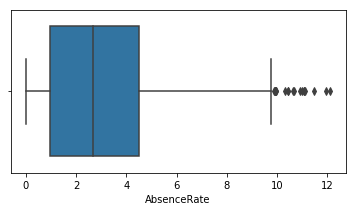

In [29]:


import seaborn as sns
sns.boxplot(data.AbsenceRate)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 3)
fig.savefig('test2png.png', dpi=100)

### AbsenceRate ~ Age

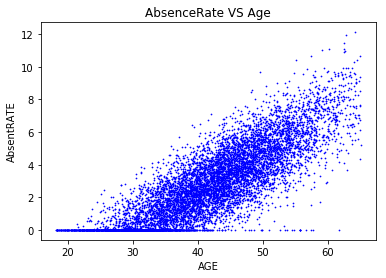

<Figure size 1296x1080 with 0 Axes>

In [30]:

plt.scatter(data.Age,data.AbsenceRate,label='',color='blue',s=0.5)
plt.xlabel('AGE')
plt.ylabel('AbsentRATE')

plt.title('AbsenceRate VS Age')
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 15)
fig.savefig('test2png.png', dpi=100)

In [31]:
##the correlation between AbsenceRate VS Age
np.corrcoef(data.Age,data.AbsenceRate)


array([[1.        , 0.82461291],
       [0.82461291, 1.        ]])

### LengthService ~ Age

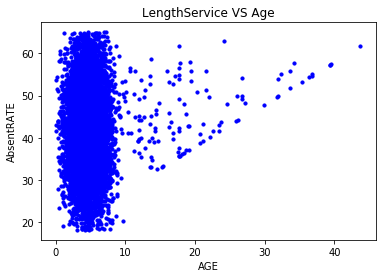

<Figure size 1080x216 with 0 Axes>

In [32]:

plt.scatter(data.LengthService,data.Age,label='',color='blue',s=10)
plt.xlabel('AGE')
plt.ylabel('AbsentRATE')

plt.title('LengthService VS Age')
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 3)
fig.savefig('test2png.png', dpi=100)


In [33]:
##the correlation between LengthService VS Age

np.corrcoef(data.Age,data.LengthService)



array([[1.        , 0.05623405],
       [0.05623405, 1.        ]])

### Absence Rate By Gender

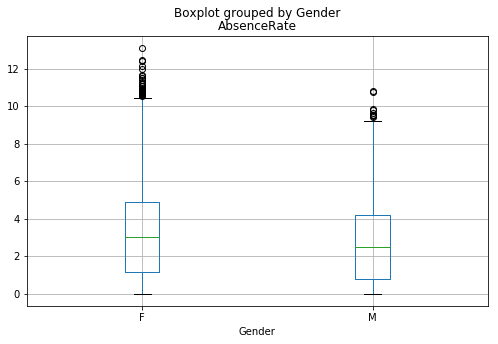

In [34]:
#Categorical

data = pd.read_csv("MFGEmployees4.csv")
data['AbsenceRate'] =data.AbsentHours / 2080 * 100

data.boxplot('AbsenceRate',by='Gender')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)
fig.savefig('test2png.png', dpi=100)

## Anova introduction

In [35]:
#Absence Rate By Gender

mod = ols('AbsenceRate ~ Gender', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 


                sum_sq      df           F        PR(>F)
Gender      549.943335     1.0  100.116731  1.947633e-23
Residual  45778.839521  8334.0         NaN           NaN


In [36]:
#Absence Rate By City

mod = ols('AbsenceRate ~ City', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                sum_sq      df         F    PR(>F)
City       1186.776788   242.0  0.879189  0.909642
Residual  45142.006068  8093.0       NaN       NaN


In [37]:
#Absence Rate By JobTitle

mod = ols('AbsenceRate ~JobTitle', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                sum_sq      df         F    PR(>F)
JobTitle    298.333148    46.0  1.167886  0.203337
Residual  46030.449707  8289.0       NaN       NaN


In [38]:
#Absence Rate By DepartmentName

mod = ols('AbsenceRate ~DepartmentName', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                      sum_sq      df         F    PR(>F)
DepartmentName    187.863807    20.0  1.692736  0.027351
Residual        46140.919049  8315.0       NaN       NaN


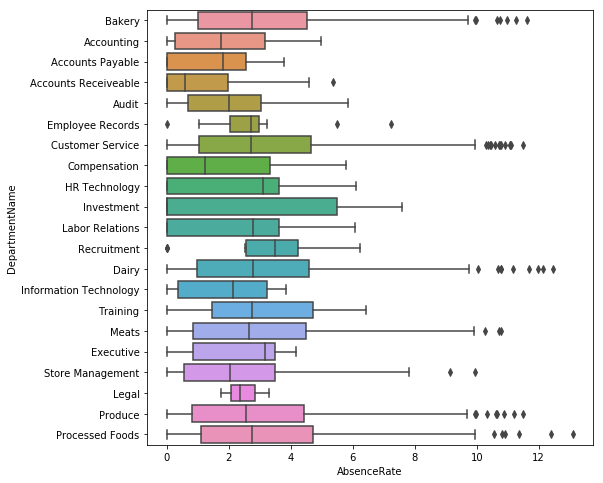

In [39]:
import seaborn as sns
sns.boxplot(data.AbsenceRate,data.DepartmentName)



fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)
fig.savefig('test2png.png', dpi=100)

In [40]:
#Absence Rate By StoreLocation


mod = ols('AbsenceRate ~StoreLocation', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                     sum_sq      df         F    PR(>F)
StoreLocation    204.498824    39.0  0.943116  0.571472
Residual       46124.284031  8296.0       NaN       NaN


In [41]:
#Absence Rate By Division

mod = ols('AbsenceRate ~Division', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                sum_sq      df         F    PR(>F)
Division    101.932747     5.0  3.673622  0.002537
Residual  46226.850108  8330.0       NaN       NaN


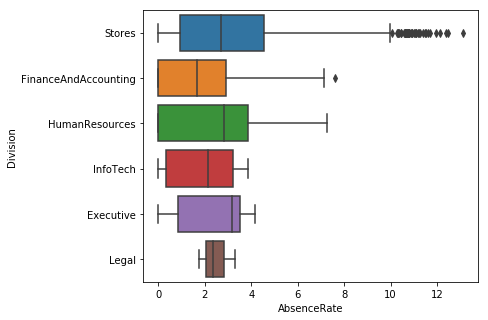

In [42]:
import seaborn as sns
sns.boxplot(data.AbsenceRate,data.Division)


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 5)
fig.savefig('test2png.png', dpi=100)

In [43]:
#Absence Rate By BusinessUnit

mod = ols('AbsenceRate ~BusinessUnit', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                    sum_sq      df          F    PR(>F)
BusinessUnit     82.616012     1.0  14.888193  0.000115
Residual      46246.166844  8334.0        NaN       NaN


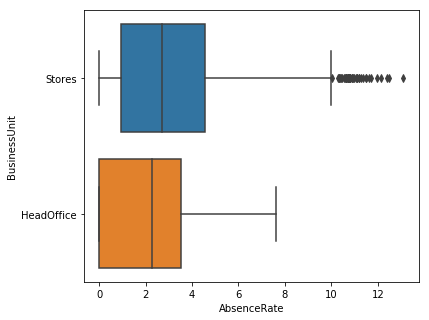

In [44]:
import seaborn as sns
sns.boxplot(data.AbsenceRate,data.BusinessUnit)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 5)
fig.savefig('test2png.png', dpi=100)

In [45]:
#Absence Rate By Division * Gender

mod = ols('AbsenceRate ~Division * Gender', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                       sum_sq      df           F        PR(>F)
Division           102.433425     5.0    3.733744  2.231858e-03
Gender             550.444012     1.0  100.319655  1.760752e-23
Division:Gender      3.442610     5.0    0.125485  9.867089e-01
Residual         45672.963486  8324.0         NaN           NaN


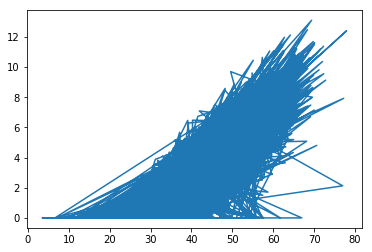

<Figure size 360x360 with 0 Axes>

In [46]:
plt.plot('Age','AbsenceRate',data=data)
plt.show()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5, 5)
fig.savefig('test2png.png', dpi=100)

In [47]:

mod = ols('AbsenceRate ~ Age', data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table) 

                sum_sq      df             F  PR(>F)
Age       31933.902428     1.0  18488.319106     0.0
Residual  14394.880427  8334.0           NaN     NaN


# Additional Plots

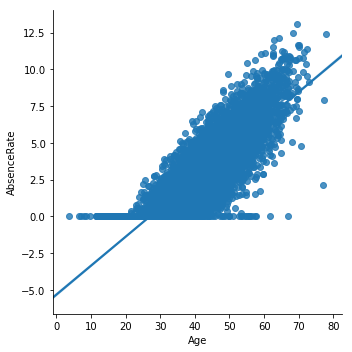

In [48]:
## linear regression

sns.lmplot(x='Age',y='AbsenceRate',data=data)

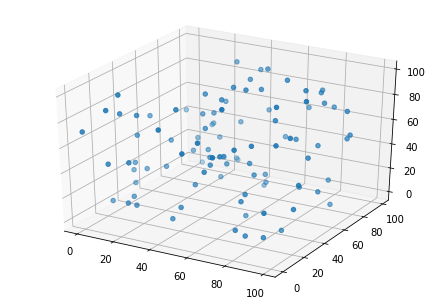

<Figure size 360x360 with 0 Axes>

In [49]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

AbsenceRate = list(range(0, 100))
Age = list(range(0, 100))
LengthService = list(range(0, 100))

random.shuffle(AbsenceRate)
random.shuffle(Age)
random.shuffle(LengthService)

ax.scatter(AbsenceRate,Age,LengthService)
pyplot.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5, 5)
fig.savefig('test2png.png', dpi=100)

In [50]:
print(data.isnull().sum())

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
AbsenceRate       0
dtype: int64


In [51]:
data=data.dropna() 


In [52]:
data.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit,AbsenceRate
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores,1.758524
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores,1.450244
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores,4.029221
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores,3.366354
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores,0.000000


In [53]:


#data['AbsenceRate'] =data.AbsentHours / 2080 * 100



import warnings
warnings.filterwarnings('ignore')



In [54]:
print(data.isnull().sum())

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       0
BusinessUnit      0
AbsenceRate       0
dtype: int64


In [55]:
data.AbsenceRate = data.AbsenceRate.astype(int)


In [56]:
data.Age = data.Age.astype(int)
data.AbsentHours = data.AbsentHours.astype(int)
data.LengthService = data.LengthService.astype(int)

In [57]:
data1 =data.drop(["EmployeeNumber","Surname","GivenName","City","JobTitle","AbsenceRate"], axis=1)

data1.head()

,Gender,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Bakery,Burnaby,Stores,32,6,36,Stores
1,M,Bakery,Nanaimo,Stores,40,5,30,Stores
2,M,Bakery,Richmond,Stores,48,4,83,Stores
3,F,Bakery,Victoria,Stores,44,3,70,Stores
4,M,Bakery,New Westminster,Stores,35,3,0,Stores


In [58]:
data1=data1.dropna() 
data1.head()

,Gender,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,F,Bakery,Burnaby,Stores,32,6,36,Stores
1,M,Bakery,Nanaimo,Stores,40,5,30,Stores
2,M,Bakery,Richmond,Stores,48,4,83,Stores
3,F,Bakery,Victoria,Stores,44,3,70,Stores
4,M,Bakery,New Westminster,Stores,35,3,0,Stores


In [59]:
## Gender

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data1.Gender)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
data1.Gender=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
data1.Gender

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)




[0 1 1 ... 0 0 1]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [60]:
## DepartmentName

labelencoder=LabelEncoder()
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data1.DepartmentName)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
data1.DepartmentName=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
data1.DepartmentName

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)


[4 4 4 ... 6 7 7]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
###  StoreLocation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data1.StoreLocation)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
data1.StoreLocation=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
data1.StoreLocation

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[ 4 17 28 ... 37 34 34]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
###  Division

labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data1.Division)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
data1.Division=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
data1.Division

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[5 5 5 ... 5 5 5]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [63]:
###  BusinessUnit

labelencoder=LabelEncoder()


label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data1.BusinessUnit)
print(integer_encoded)

onehot=OneHotEncoder(sparse=False)
data1.BusinessUnit=integer_encoded=integer_encoded.reshape(len(integer_encoded),1)
data1.BusinessUnit

onehot_encoded=onehot.fit_transform(integer_encoded)
print(onehot_encoded)

[1 1 1 ... 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [64]:
data1.head()

,Gender,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,0,4,4,5,32,6,36,1
1,1,4,17,5,40,5,30,1
2,1,4,28,5,48,4,83,1
3,0,4,36,5,44,3,70,1
4,1,4,20,5,35,3,0,1


In [65]:
x= data1.iloc[:,0:8]

In [66]:
y= data.iloc[:,13]

In [67]:
x.head()

,Gender,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,0,4,4,5,32,6,36,1
1,1,4,17,5,40,5,30,1
2,1,4,28,5,48,4,83,1
3,0,4,36,5,44,3,70,1
4,1,4,20,5,35,3,0,1


In [68]:
y.head()

0    1
1    1
2    4
3    3
4    0
Name: AbsenceRate, dtype: int32

# feature importance

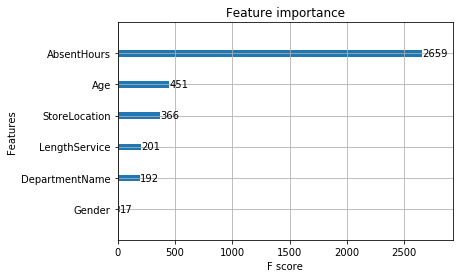

In [72]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
#split data into x and y
x= data1.iloc[:,0:8]
y=data.iloc[:,13]
#mod
model=XGBClassifier()
model.fit(x,y)
plot_importance(model)
pyplot.show()

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


In [76]:


from sklearn.tree import DecisionTreeClassifier,export_graphviz,DecisionTreeRegressor

In [77]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [78]:
#from sklearn.cross_validation import train_test_split
#import numpy as np
#x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)




clf_entropy=DecisionTreeRegressor(max_depth=3,
            max_features=None, max_leaf_nodes=2, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100,splitter='best')




In [79]:
clf_entropy.fit(x_train,y_train)



DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=2, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [80]:
y_pred = clf_entropy.predict(x_test)
y_pred

array([4.60629643, 0.8350365 , 4.60629643, ..., 4.60629643, 4.60629643,
       4.60629643])

## R-Square value

In [81]:

print("R-Squared on train dataset={}".format(clf_entropy.score(x_test,y_test)))

clf_entropy.fit(x_test,y_test)  


R-Squared on train dataset=0.6969541106916386


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=2, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

## Decision tree 

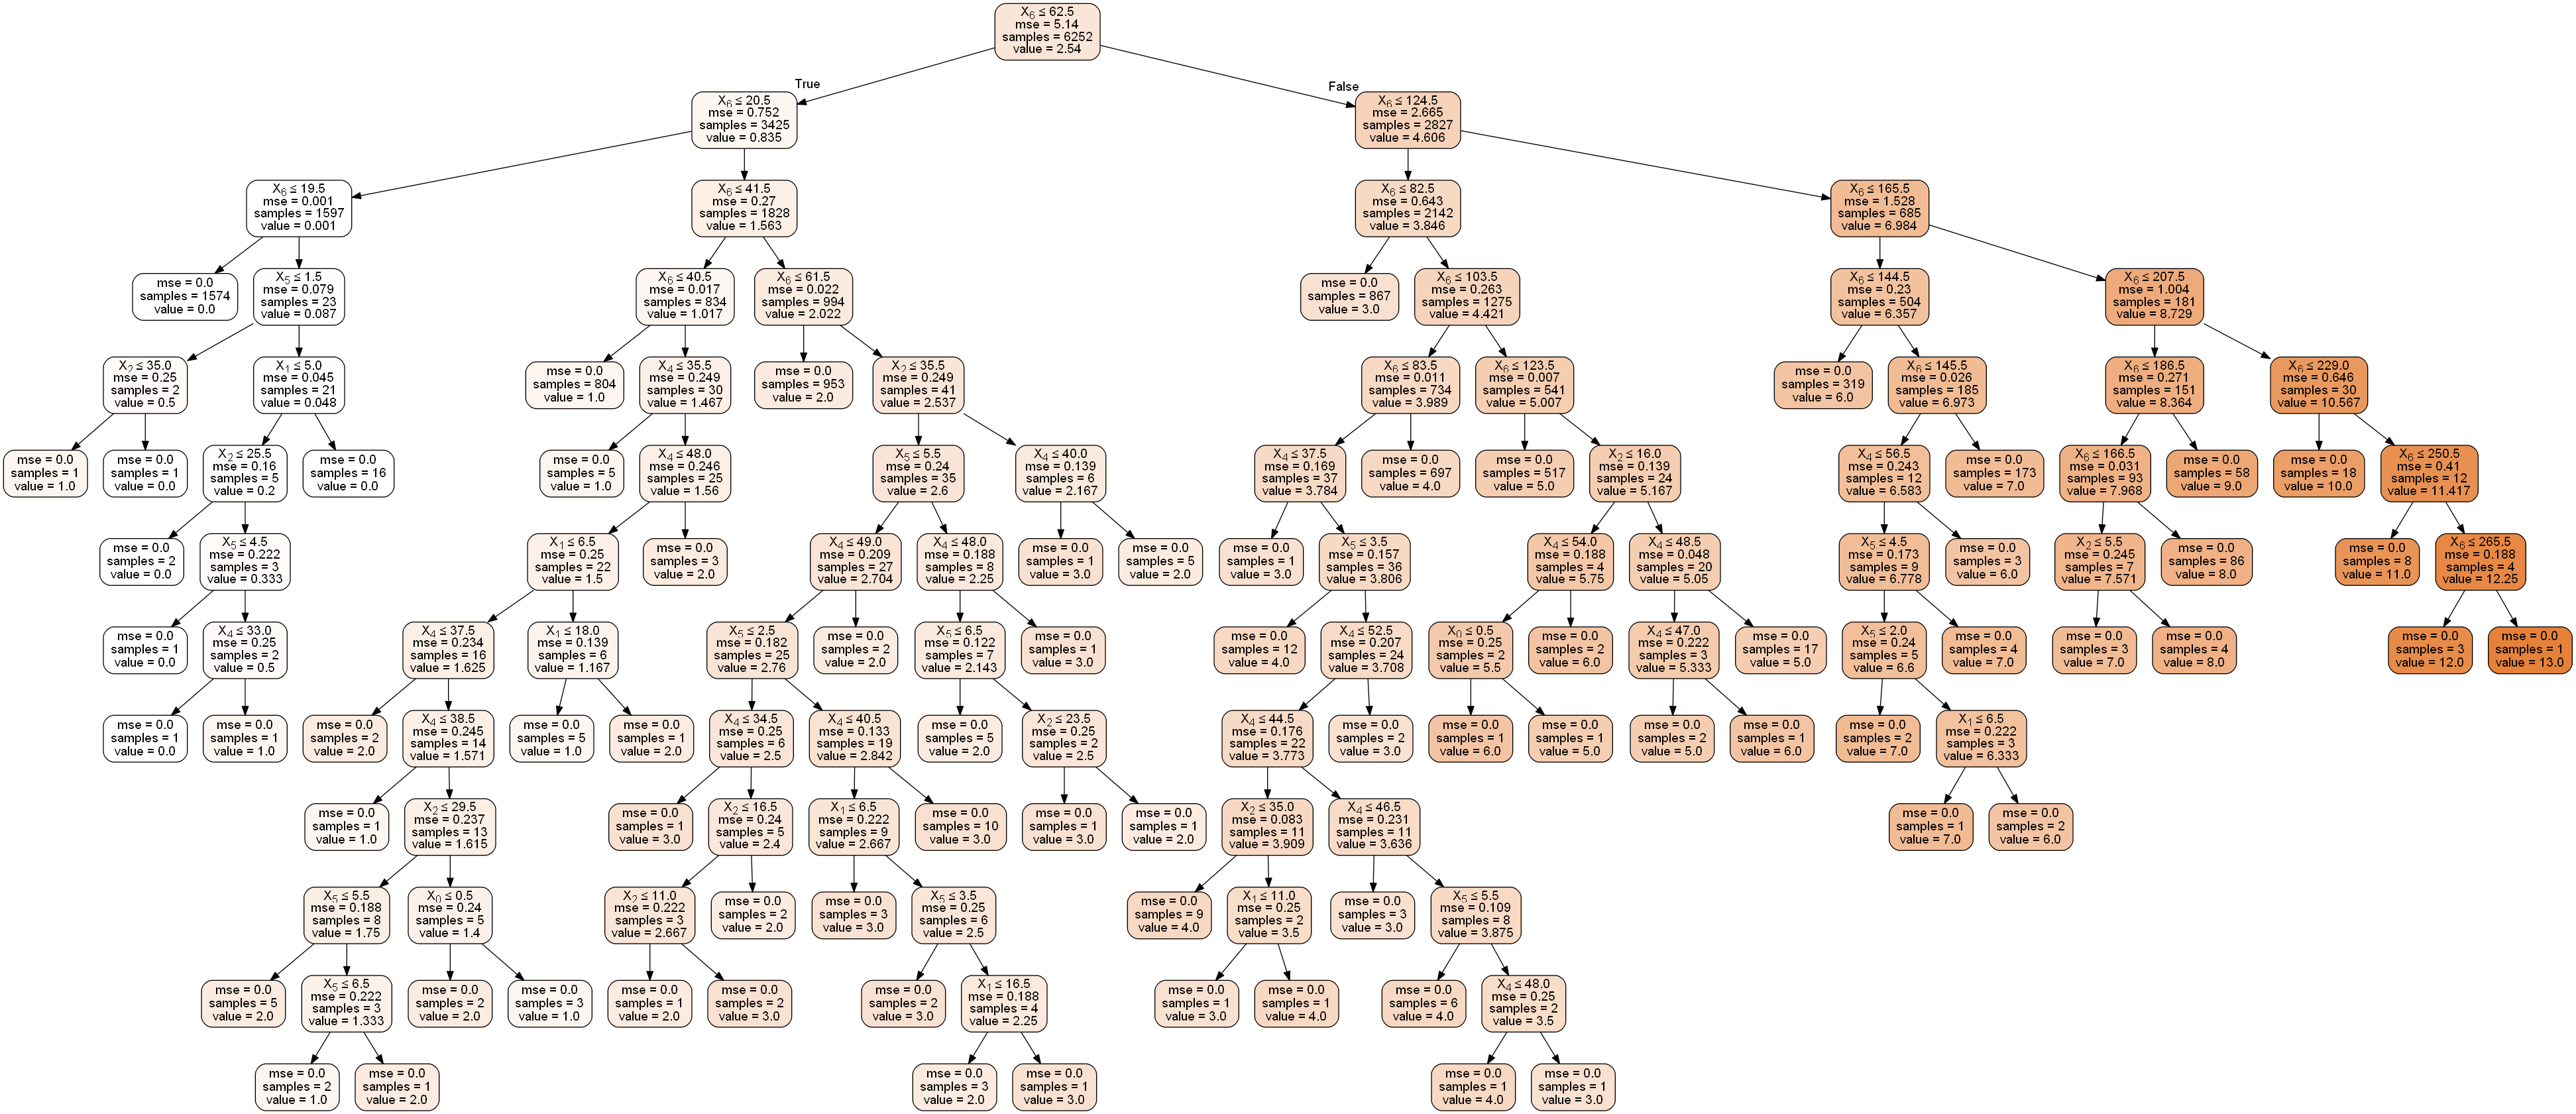

In [82]:

import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
estimator = tree.DecisionTreeRegressor()
estimator.fit(x_train, y_train)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [83]:

print("R-Squaredon test dataset={}".format(clf_entropy.score(x_train,y_train)))

R-Squaredon test dataset=0.685173843755535


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [85]:
#initialisation of linear regression 
linear_model = LinearRegression()
#inserting the train data in model for training purpose 
linear_model.fit(x,y)
#now model trained with this data
#now we will do prediction for the data 
y_pred = linear_model.predict(x_test)
#test our result how accurate our model is 
error = y_test-y_pred
#e= np.sum(error)
#abserror = np.absolute(error)
#sqrarr= np.square(error)
#addall= np.sum(sqrarr)
print('Coefficients: \n', linear_model.coef_)
print("\nMean squared error: %.2f \n"
      % mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

Coefficients: 
 [ 4.44773105e-03 -6.57684327e-04 -1.10333886e-05  5.26788528e-03
 -7.39232562e-03  2.12589039e-03  4.71829096e-02 -1.03438962e-01]

Mean squared error: 0.09 

0.9833525997676484


In [86]:
data.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit', 'AbsenceRate'],
      dtype='object')

In [87]:
data.head(3)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit,AbsenceRate
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32,6,36,Stores,1
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40,5,30,Stores,1
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48,4,83,Stores,4


In [88]:
data1 =data.drop(["EmployeeNumber","Surname","GivenName","City","JobTitle","AbsenceRate","Gender","DepartmentName","StoreLocation","Division","AbsentHours","BusinessUnit"], axis=1)

data1.head()

,Age,LengthService
0,32,6
1,40,5
2,48,4
3,44,3
4,35,3


In [89]:
x= data1.iloc[:,0:2]

In [90]:
x.head()

,Age,LengthService
0,32,6
1,40,5
2,48,4
3,44,3
4,35,3


In [91]:
y= data.iloc[:,13]

In [92]:
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate

In [93]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)



In [94]:
#### Generate 2019 data

In [95]:

Absence2019Data = data

In [96]:
Absence2019Data=Absence2019Data[['Age','LengthService']]

In [97]:

Absence2019Data.head()

,Age,LengthService
0,32,6
1,40,5
2,48,4
3,44,3
4,35,3


In [98]:
Absence2019Data.Age = Absence2019Data.Age + 1

In [99]:
Absence2019Data.LengthService = Absence2019Data.LengthService + 1

In [100]:
#Absence2019Data.AbsenceRate = 0

In [101]:
x1=data1[['Age','LengthService']]
y1=data[['AbsenceRate']]

In [102]:
model = LinearRegression()
model.fit(x1,y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
pred=model.predict(Absence2019Data)
pred

array([[0.74191157],
       [2.30916259],
       [3.87641362],
       ...,
       [5.74012805],
       [2.79199744],
       [3.42739125]])

In [104]:
np.mean(data.AbsenceRate)

2.5338291746641075

# the predtion results

In [105]:
A=pd.DataFrame(pred,columns = ['Absence2019Data'])
A

,Absence2019Data
0,0.741912
1,2.309163
2,3.876414
3,3.207207
4,1.529864
5,4.028973
6,3.791480
7,1.639956
8,5.587569
9,1.512555
